In [1]:
import csv

In [2]:
#PASO 1

x="type_of_dirt"
y="dirtiness"
z="wash_time"

In [3]:
data = {x: [], y: [], z: []}

In [4]:
csvFile = csv.reader(open("test_Data.csv","rt"))

In [5]:
for row in csvFile:
    data[x].append(row[0])
    data[y].append(row[1])
    data[z].append(row[2])

In [6]:
for  data_i  in  data:
         data[data_i]  =  data[data_i][1:]
        
for data_i in data:
    data[data_i] = list(map(float, data[data_i]))

In [7]:
def triangular_function(x, a, m,b):
    if x<a:
        return 0
    elif a<=x and x<=m:
        return (x-a)/(m-a)
    elif m<=x and x<=b:
        return (b-x)/(b-m)
    else:
        return 0

In [8]:
x_NotGreasy = "NotGreasy"
x_Medium = "Medium"
x_Greasy = "Greasy"

y_Small = "Small"
y_Medium = "Medium"
y_Large = "Large"

z_VeryShort = "VeryShort"
z_Short = "Short"
z_Medium = "Medium"
z_Long = "Long"
z_VeryLong = "VeryLong"

In [9]:
grades_x = [x_NotGreasy, x_Medium, x_Greasy]
grades_y = [y_Small, y_Medium, y_Large]
grades_z = [z_VeryShort, z_Short, z_Medium, 
            z_Long, z_VeryLong]

In [10]:
def x_MF(grade_x, x):
    if grade_x == x_NotGreasy:
        return triangular_function(x, -50, 0, 50)
    elif grade_x == x_Medium:
        return triangular_function(x, 0, 50, 100)
    elif grade_x == x_Greasy:
        return triangular_function(x, 50, 100, 150)

In [11]:
def y_MF(grade_y, x):
    if grade_y == y_Small:
        return triangular_function(x, -50, 0, 50)
    elif grade_y == y_Medium:
        return triangular_function(x, 0, 50, 100)
    elif grade_y == y_Large:
        return triangular_function(x, 50, 100, 150)

In [12]:
def z_MF(grade_z, x):
    if grade_z == z_VeryShort:
        return triangular_function(x, 0, 8, 12)
    elif grade_z == z_Short:
        return triangular_function(x, 8, 12, 20)
    elif grade_z == z_Medium:
        return triangular_function(x, 12, 20, 35)
    elif grade_z == z_Long:
        return triangular_function(x, 30, 40, 60)
    elif grade_z == z_VeryLong:
        return triangular_function(x, 45, 60, 75)

In [13]:
# PASO 2

n = len(data[x])


combinations = []

for i in range(n):
    combination = []
    for data_i in [x]:
        grade_ = 0
        combiniation_ = []
        
        for grade in grades_x:
            logical_value = x_MF(grade, data[data_i][i])
            if logical_value > grade_ :
                grade_ = logical_value
                combination_ = [data[data_i][i], grade, logical_value]
        
        combination.append(combination_)
    
    for data_i in [y]:
        grade_ = 0
        
        for grade in grades_y:
            logical_value = y_MF(grade, data[data_i][i])
            if logical_value > grade_ :
                grade_ = logical_value
                combination_ = [data[data_i][i], grade, logical_value]
        combination.append(combination_)
    
    for data_i in [z]:
        grade_ = 0
        
        for grade in grades_z:
            logical_value = z_MF(grade, data[data_i][i])
            if logical_value > grade_ :
                grade_ = logical_value
                combination_ = [data[data_i][i], grade, logical_value]
        combination.append(combination_)
    
    combinations.append(combination)

# PASO 3    

rules = []
for combination in combinations:
    rules.append([combination[0][1], combination[1][1], combination[2][1],
                  combination[0][2]*combination[1][2]*combination[2][2]]) 
    
print("--------------")
print("   Reglas Generadas con su grado  en cada fila del dataset")
for rule in rules:
    print(rule)
print("-------------")
    

unique_rules = [list(x) for x in set(tuple(x[:len(x)-1]) for x in rules)]

print("--------------")
print("   Reglas Generadas")
for unique_rule in unique_rules:
    print(unique_rule)
print("--------------")

--------------
   Reglas Generadas con su grado  en cada fila del dataset
['Medium', 'Medium', 'Long', 0.13526016000000018]
['Medium', 'Small', 'Medium', 0.3010406400000001]
['NotGreasy', 'Medium', 'Medium', 0.25404736]
['NotGreasy', 'Medium', 'Medium', 0.18375552]
['Medium', 'Medium', 'Medium', 0.5061007466666666]
['NotGreasy', 'Medium', 'Short', 0.7495921999999999]
['Greasy', 'Medium', 'Long', 0.28491455999999993]
['NotGreasy', 'Medium', 'Medium', 0.4987584000000001]
['Medium', 'Small', 'Medium', 0.3007125]
['NotGreasy', 'Medium', 'Medium', 0.20218499999999992]
['Greasy', 'Small', 'Long', 0.6834128]
['NotGreasy', 'Large', 'Medium', 0.20157896000000003]
['Medium', 'Small', 'Medium', 0.4031447999999999]
['Medium', 'Medium', 'Medium', 0.35257728000000005]
['Medium', 'Large', 'Long', 0.42381247999999994]
['NotGreasy', 'Small', 'Short', 0.43611750000000005]
['Greasy', 'Medium', 'Long', 0.37518000000000007]
['Medium', 'Small', 'Medium', 0.6236236533333334]
['NotGreasy', 'Medium', 'Medium',

In [14]:
# PASO 4

final_rules = []

set_rules = {}

def getMaxGradeRule(rules):
    grade = 0
    rule_return = []
    for rule in rules:
        if rule[len(rule)-1] > grade:
            grade = rule[len(rule)-1]
            rule_return = rule
    return rule_return
    
for rule in rules:
    if set_rules.get(", ".join(rule[:len(rule)-2]), None) is None:
        set_rules[", ".join(rule[:len(rule)-2])] = [rule]
    set_rules[", ".join(rule[:len(rule)-2])].append(rule)
    
for key in set_rules:
    final_rules.append(getMaxGradeRule(
        set_rules[key]
    ))
    
for rule in final_rules:
    print(rule)

['Medium', 'Medium', 'Medium', 0.80066944]
['Medium', 'Small', 'Medium', 0.6447012]
['NotGreasy', 'Medium', 'Short', 0.7495921999999999]
['Greasy', 'Medium', 'Long', 0.7497239200000001]
['Greasy', 'Small', 'Long', 0.8253197399999997]
['NotGreasy', 'Large', 'Medium', 0.7500724]
['Medium', 'Large', 'Long', 0.46766159999999996]
['NotGreasy', 'Small', 'VeryShort', 0.6730550399999998]
['Greasy', 'Large', 'Long', 0.5336654399999999]


In [15]:
# Data visualization
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [21]:
#Linguistic variables and labels
type_of_dirty = ctrl.Antecedent(np.arange(0,100,1), 'type_of_dirty')
type_of_dirty['NotGreasy'] = fuzz.trimf(type_of_dirty.universe, [0, 0, 50])
type_of_dirty['Medium'] = fuzz.trimf(type_of_dirty.universe, [0, 50, 100])
type_of_dirty['Greasy'] = fuzz.trimf(type_of_dirty.universe, [50, 100, 100])

dirtiness = ctrl.Antecedent(np.arange(0,100,1), 'dirtiness')
dirtiness['Small'] = fuzz.trimf(dirtiness.universe, [0, 0, 50])
dirtiness['Medium'] = fuzz.trimf(dirtiness.universe, [0, 50, 100])
dirtiness['Large'] = fuzz.trimf(dirtiness.universe, [50, 100, 100])

wash_time = ctrl.Consequent(np.arange(0,60,1), 'wash_time')
wash_time['VeryShort'] = fuzz.trimf(wash_time.universe, [0,8,12])
wash_time['Short'] = fuzz.trimf(wash_time.universe, [8,12,20])
wash_time['Medium'] = fuzz.trimf(wash_time.universe, [12,20,35])
wash_time['Long'] = fuzz.trimf(wash_time.universe, [30,40,60])
wash_time['VeryLong'] = fuzz.trimf(wash_time.universe, [45,60,60])

In [22]:
#Rules
true_rule1 = ctrl.Rule(type_of_dirty['NotGreasy'] 
                  & dirtiness['Small'],wash_time['VeryShort'])
true_rule2 = ctrl.Rule(type_of_dirty['NotGreasy']
                  & dirtiness['Medium'], wash_time['Short'])
true_rule3 = ctrl.Rule(type_of_dirty['NotGreasy']
                  & dirtiness['Large'], wash_time['Medium'])
true_rule4 = ctrl.Rule(type_of_dirty['Medium']
                  & dirtiness['Small'], wash_time['Medium'])
true_rule5 = ctrl.Rule(type_of_dirty['Medium']
                  & dirtiness['Medium'], wash_time['Medium'])
true_rule6 = ctrl.Rule(type_of_dirty['Medium']
                  & dirtiness['Large'], wash_time['Long'])
true_rule7 = ctrl.Rule(type_of_dirty['Greasy']
                  & dirtiness['Small'], wash_time['Long'])
true_rule8 = ctrl.Rule(type_of_dirty['Greasy']
                  & dirtiness['Medium'], wash_time['Long'])
true_rule9 = ctrl.Rule(type_of_dirty['Greasy']
                  & dirtiness['Large'], wash_time['VeryLong'])

true_rules = ctrl.ControlSystem([true_rule1, true_rule2, true_rule3
                           , true_rule3, true_rule4, true_rule5
                           , true_rule6, true_rule7, true_rule8
                           , true_rule9])

wash_machine = ctrl.ControlSystemSimulation(true_rules)

In [27]:
wm_rules_array = []

for rule in final_rules:
    wm_rules_array.append(ctrl.Rule(type_of_dirty[rule[0]]
                  & dirtiness[rule[1]], wash_time[rule[2]]))
    
wm_rules = ctrl.ControlSystem(wm_rules_array)

wm_wash_machine = ctrl.ControlSystemSimulation(wm_rules)

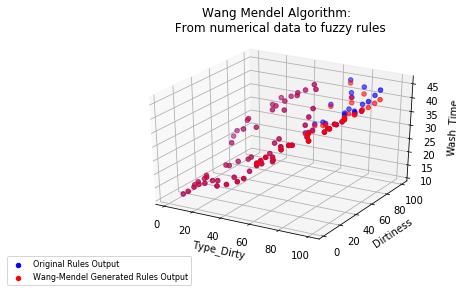

Wang-Mendel Hit: 74.73%


In [306]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot
import matplotlib.pyplot as plt
import random

X = []
Y = []
Z = []

WM_X = []
WM_Y = []
WM_Z = []

incidents = 0
coincidences = 0

for i in range(1000):
    a = random.randint(1,100)
    b = random.randint(1,100)
    
    if a not in X and b not in Y:
        wash_machine.input['type_of_dirty'] = a
        wash_machine.input['dirtiness'] = b

        wm_wash_machine.input['type_of_dirty'] = a
        wm_wash_machine.input['dirtiness'] = b
    
        try: 
            wash_machine.compute()
            wm_wash_machine.compute()

            if wm_wash_machine.output['wash_time'] is None:
                pass
            elif wash_machine.output['wash_time'] is None:
                pass
            else:
                X.append(a)
                Y.append(b)
    
                WM_X.append(a)
                WM_Y.append(b)

                incidents = incidents + 1

                if round(wash_machine.output['wash_time'],1) == round(wm_wash_machine.output['wash_time'],1):
                    coincidences = coincidences + 1

                Z.append(round(wash_machine.output['wash_time'],1))
                WM_Z.append(round(wm_wash_machine.output['wash_time'],1))   
        except ValueError:
            pass
            
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.set_title('Wang Mendel Algorithm: \n From numerical data to fuzzy rules\n')

scatter1 = ax.scatter(X, Y, Z, c = 'Blue', label = 'Blue')
scatter2 = ax.scatter(WM_X, WM_Y, WM_Z, c = 'Red')

ax.legend(['Wang-Mendel\nhits: {}%'.format(
    round(100*(incidents/coincidences),2))]
          , loc=1, bbox_to_anchor=(0.1,0.5))

ax.legend((scatter1, scatter2),
         ('Original Rules Output', 'Wang-Mendel Generated Rules Output'),
         scatterpoints=1,
         loc = 'upper right',
         ncol = 1,
         fontsize = 8,
         bbox_to_anchor=(0.25,0))


ax.set_xlabel('Type_Dirty')
ax.set_ylabel('Dirtiness')
ax.set_zlabel('Wash_Time')

plt.show()
    
print('Wang-Mendel Algorithm Hit: {}%'.format(round(100*coincidences/incidents, 2)))